# Описание проекта

Вместе с отделом маркетинга проверить список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 2. Анализ A/B-теста

Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Оглавление

1. [Изучение общей информации](#step1)  
2. [Приоритизация гипотез](#step2)  
3. [Анализ A/B-теста](#step3)  
4. [Общий вывод](#step4)  

# Изучение общей информации  <a id="step1"></a>

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)})
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Прочитаю файлы с данными и изучу информацию в них.

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Информация о таблице с гипотезами:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.options.display.max_colwidth = 110
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице с гипотезами содержится информация о 9 гипотезах. Пропущенных значений нет, все гипотезы имеют необходимые значения параметров. 

Для удобства приведу названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

Проверю результат:

In [6]:
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Информация о таблице orders:

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Необходимо изменить тип данных в столбце date, чтобы можно было работать с датой. Типы данных остальных столбцов в порядке.

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

Посмотрю уникальные значения в столбце группа

In [10]:
print("Уникальные значения в столбце group", orders['group'].unique())

Уникальные значения в столбце group ['B' 'A']


Еще необходимо проверить пользователей на присутствие в группах - не попал ли кто-то в обе группы. Так как, если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решение. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [11]:
# уникальные пользователи группы А
usersGroupA = set(orders[orders['group'] == 'A']['visitorId'])
# уникальные пользователи группы В
usersGroupB = set(orders[orders['group'] == 'B']['visitorId'])
# уникальные пользователи обеих групп
usersIntersection = list(usersGroupA & usersGroupB)
print("Количество пользователей, которые попали в группу А и В одновременно, равно", len(usersIntersection))

Количество пользователей, которые попали в группу А и В одновременно, равно 58


Очищу данные от таких пользователей:

In [12]:
orders = orders.query('visitorId not in @usersIntersection')
print("Количество пользователей, которые остались после очистки данных от дублей, равно", orders.shape[0])

Количество пользователей, которые остались после очистки данных от дублей, равно 1016


In [13]:
print('Количество дубликатов в таблице orders = {:.0f}'.format(orders.duplicated().sum()))

Количество дубликатов в таблице orders = 0


Информация о таблице visitors:

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Необходимо изменить тип данных в столбце date, чтобы можно было работать с датой. Типы данных остальных столбцов в порядке.

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])

Посмотрю уникальные значения в столбце группа

In [17]:
print("Уникальные значения в столбце group", visitors['group'].unique())

Уникальные значения в столбце group ['A' 'B']


In [18]:
print('Количество дубликатов в таблице visitors = {:.0f}'.format(visitors.duplicated().sum()))

Количество дубликатов в таблице visitors = 0


### Итоги предобработки данных:

Имеется 3 таблицы:

**hypothesis** - таблица с гипотезами, которые необходимо проверить. 

* В таблице 5 столбцов и 9 гипотез. 
* Все параметры Reach, Impact, Confidence, Efforts заполнены, имеют значения по 10-бальной шкале. 
* Названия столбцов приведены к нижнему регистру.

**orders** - таблица с информацией по заказам с делением на группы АБ-теста.

* В таблице 5 столбцов и 1016 строк. Удалено 58 дублей.
* Столбец с датой приведен к нужному типу. 
* В столбце с группой теста только значения A и B.
* Пропущенных значений нет.

**visitors** - таблица с информацией по количеству пользователей и группой АБ-теста.

* В таблице 3 столбца и 62 строки.
* Столбец с датой приведен к нужному типу.
* В столбце с группой теста только значения A и B.
* Дублей нет.
* Пропущенных значений нет.

# Приоритизация гипотез <a id="step2"></a>

Применю фреймворк ICE для приоритизации гипотез.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

_Impact_ — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

_Confidence_ — насколько вы уверены, что это изменение повлияет на пользователей именно так;

_Efforts_ — сколько стоит протестировать эту гипотезу.

Все эти данные представлены в таблице data, воспользуюсь формулой и отсортирую гипотезы по убыванию приоритета.

In [19]:
data['ICE'] = (data['impact'] * data['confidence'] / data['efforts']).round(2)
data.sort_values(by='ICE',ascending = False).loc[:, ['hypothesis', 'ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE в порядке убывания приоритета:
- 8 - Запустить акцию, дающую скидку на товар в день рождения
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Теперь применю фреймворк RICE для приоритизации гипотез.

У метода ICE есть модификация RICE (R от англ. reach, «охват»):

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

_Reach_ — скольких пользователей затронет изменение, которое вы хотите внести;

_Impact_ — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

_Confidence_ — насколько вы уверены, что это изменение повлияет на пользователей именно так;

_Efforts_ — сколько стоит протестировать эту гипотезу.

Все эти данные представлены в таблице data, воспользуюсь формулой и отсортирую гипотезы по убыванию приоритета.

In [20]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data.sort_values(by='RICE',ascending = False).loc[:, ['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE в порядке убывания приоритета:
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Перспективные гипотезы, посчитанные разными фреймворками ICE и RICE, получились разные 8,0,7 и 7,2. Так получилось, потому что гипотезы 7 и 2 имеют высокий показатель Reach 10 и 8 соответственно, в то время как у гипотез 8 и 0, этот показатель равень 1 и 3 соответственно.

### Итоги приоритизации

С помощью фреймворков ICE и RICE были отобраны наиболее перспективные гипотезы:

* с помощью ICE получила 8,0,7 гипотезы
* с помощью RICE получила 7,2 гипотезы.

Изменение произошло по причине того, что формула фреймворка RICE учитывает охват пользователей, а формула фреймворка ICE не учитывает. Восьмая гипотеза охватит наименьший объем пользователей, а седьмая - наибольший, соответственно результат получается разный.

# Анализ A/B-теста <a id="step3"></a>

Построю график кумулятивной выручки по группам.

In [21]:
# создаю датафрейм с уникальными парами значений 'date' и 'group' таблицы orders
datesGroups = orders[['date','group']].drop_duplicates()

Теперь нужно получить строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. Затем агрегировать значения. Вычислить максимальную дату. Для группы тоже рассчитать максимум. Найти число уникальных ID заказов и пользователей. Подсчитать сумму выручки:

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                                        .sort_values(by=['date','group'])

Аналогично получу агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                        .sort_values(by=['date','group'])

Объединю кумулятивные данные в одной таблице и присвою ее столбцам понятные названия

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

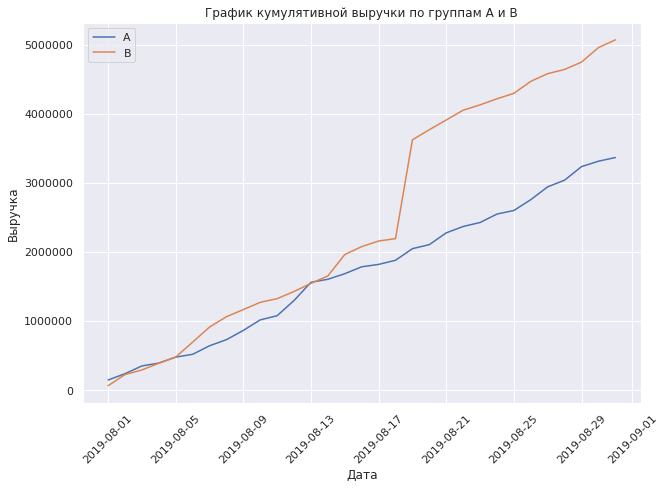

In [27]:
# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# график выручки группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам A и B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста в группе А, есть небольшой скачок 13.08.2019. График выручки группы В 19.08.2019 резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы необходимо проанализировать отдельно.

Теперь построю графики среднего чека по группам — разделю кумулятивную выручку на кумулятивное число заказов:

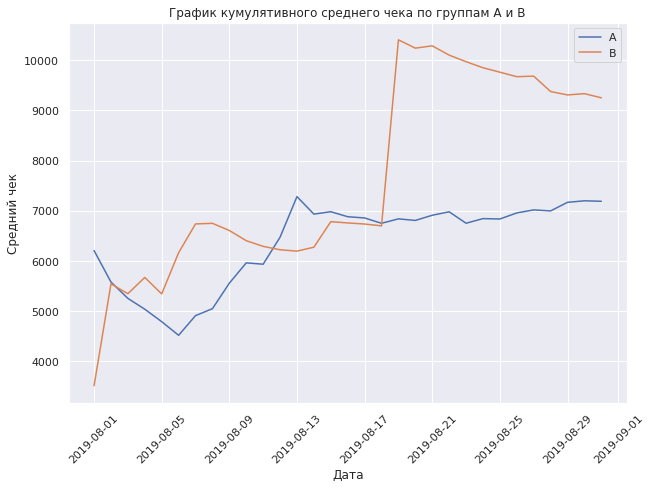

In [28]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам A и B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Средний чек становится равномерным ближе к концу теста для группы A. Для группы В после резкого роста 19.08.2019 продолжает падать. Возможно, в группу B в середине теста попали крупные заказы. Тогда группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построю график относительного различия для среднего чека:

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

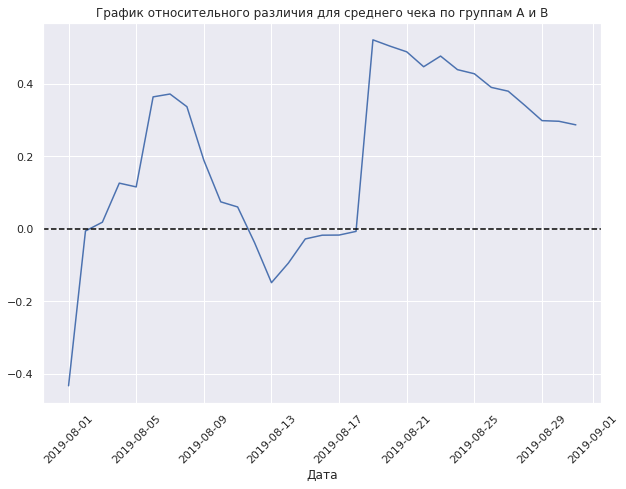

In [30]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного различия для среднего чека по группам A и B')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

В нескольких точках график различия в среднем чеке резко «скачет». Видимо, именно тогда были совершены аномальные заказы.

Проанализирую график кумулятивной конверсии:

In [31]:
# считаю кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяю данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяю данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

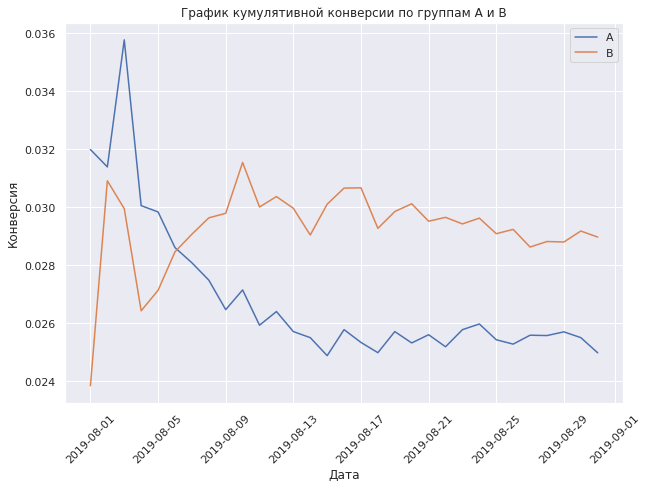

In [32]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.xticks(rotation=45)
#plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])
plt.show()

В начале теста группа А имела бОльшую конверсию, но примерно 7.08.2019 группа В сравнялась с группой А, еще подросла и стабилизировалась в районе значения 0.029. В то время как конверсия группы А наоборот упала и стабилизировалась в районе значения 0.025.

Теперь построю график относительного различия кумулятивных конверсий:

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
        .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

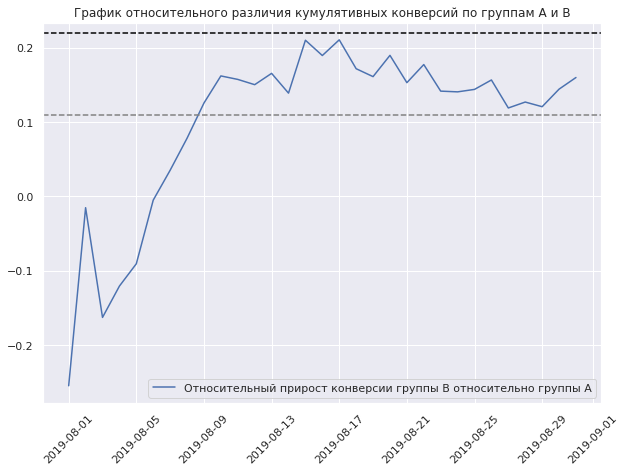

In [34]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('График относительного различия кумулятивных конверсий по группам A и B')
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=0.22, color='black', linestyle='--')
plt.axhline(y=0.11, color='grey', linestyle='--')
plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя, выводы можно будет делать после анализа выбросов и аномалий. 

In [35]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Построю точечный график количества заказов по пользователям:

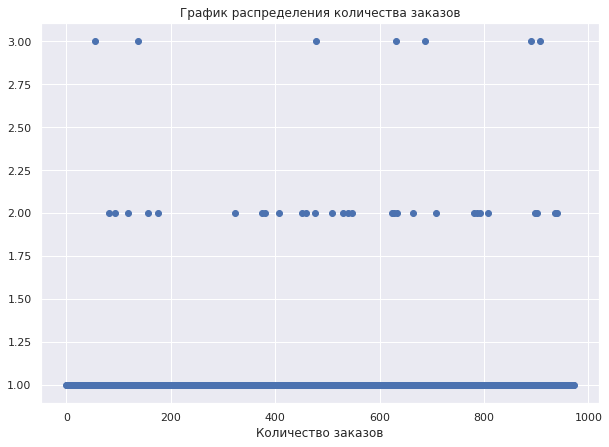

In [36]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График распределения количества заказов')
plt.xlabel('Количество заказов')
plt.show()

Большинство покупателей заказывало только один раз, но есть и те кто заказывал 2-3 раза. Посчитаю перцентили, чтобы понять какое количество заказов считать аномальным.

In [37]:
# 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Более одного заказа оформили не более 5% пользователей. Тех, кто оформил более двух заказов - не более процента. Граница до двух заказов кажется разумной, поскольку такие пользователи все же регулярно встречаются на графике, а все что выше - аномалия.

Построю точечный график стоимостей заказов:

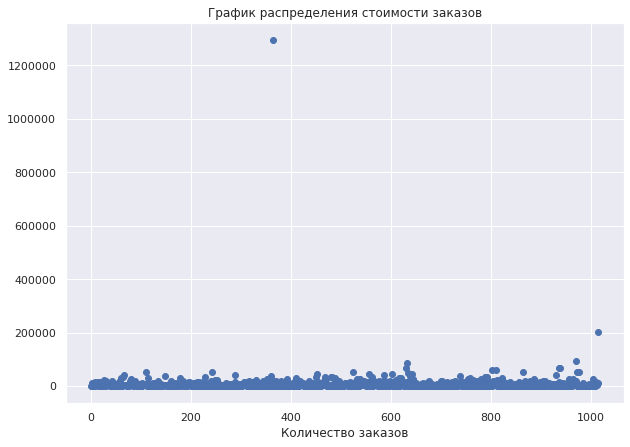

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График распределения стоимости заказов')
plt.xlabel('Количество заказов')
plt.show()

Два заказа выглядят аномально, один из них стоимостью выше 1,2 млн. Посчитаю перцентили:

In [39]:
# 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26785 и не более 1% заказов дороже 53904. Для будущих расчетов возьму порог в 30 000.

Посчитаю статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным

In [40]:
# количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [41]:
# количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [42]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
#  ordersPerDateA - количество заказов в выбранную дату в группе A
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# суммарное число заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [43]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
#  ordersPerDateB - количество заказов в выбранную дату в группе B
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# суммарное число заказов до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [44]:
# объединяю полученные таблицы в общий датафрейм по дате
data2 = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data2.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаю статистическую значимость различия в конверсии между группами.

Создам переменные ordersByUsersA и ordersByUsersB со столбцами 'userId' и 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов:

In [45]:
# подсчет количества заказов для тех пользователей, кто сделал хоть один заказ из группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
# подсчет количества заказов для тех пользователей, кто сделал хоть один заказ из группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявлю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data2['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data2['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Посмотрю на гистограмму распределения получившихся выборок sampleA и sampleB.

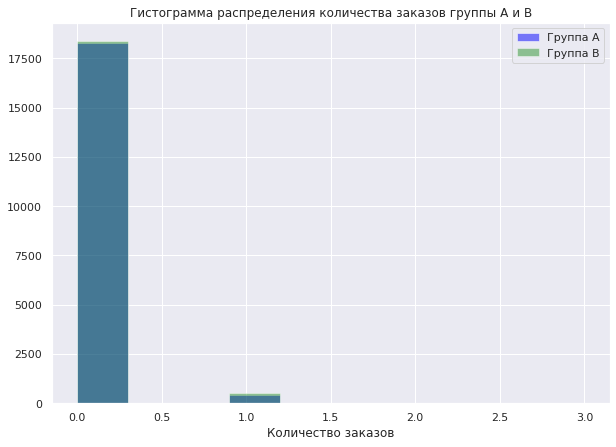

In [47]:
plt.title('Гистограмма распределения количества заказов группы А и В')
plt.xlabel('Количество заказов')
plt.hist(sampleA, alpha = 0.5, color='blue', label='Группа А')
plt.hist(sampleB,alpha = 0.4, color='green', label='Группа B')
plt.legend()
plt.show()

Гистограмма выборок не похожа на нормальное распеределение, на всякий случай проверю гипотезу о нормальности с использованием критерия Шапиро-Уилка, поскольку он обладает бОльшей мощностью, чем критерий хи-квадрат.

**Гипотеза 0**: sampleA распределена по нормальному закону

**Гипотеза 1**: sampleA распределена не нормально

In [48]:
# критический уровень статистической значимости
alpha = 0.05

results = stats.shapiro(sampleA)
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Теперь для sampleВ.

**Гипотеза 0**: sampleВ распределена по нормальному закону

**Гипотеза 1**: sampleВ распределена не нормально

In [49]:
alpha = 0.05  

results = stats.shapiro(sampleB)
p_value = results[1]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Обе выборки с количеством заказов распределены не нормально. Это значит, что для проверки статистической значимости различий в конверсии между группами по «сырым» данным нужно использовать непараметрический критерий Уилкоксона-Манна-Уитни, так как:

1) сравниваемые значения не составляют пару коррелирующих  значений

2) распределение признаков в каждой выборке не соответствует нормальному распределению

3) в данных есть выбросы и параметрические критерии могут дать неверный результат. 

Сформулирую нулевую и альтернативную гипотезы. 

**Гипотеза 0:** Конверсия между группами по «сырым» данным одинакова

**Гипотеза 1:** Разница в конверсии между группами по «сырым» данным статистически значима

Задам уровень значимости = 0.05

In [50]:
alpha = 0.05  
results = stats.mannwhitneyu(sampleA, sampleB, True, alternative = 'two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print("Конверсия группы В выше на {0:.1%}".format((sampleB.mean() / sampleA.mean() - 1)))   

p-значение:  0.011018084110014691
Отвергаем нулевую гипотезу: разница статистически значима
Конверсия группы В выше на 16.0%


P-value меньше, чем 0.05. Значит, на сырых данных гипотезу об отсутствии статистически значимых различий в конверсии нужно отвергнуть: конверсия отличается. Второе число показывает, что конверсия группы В на сырых данных статистически выше на 16.0%.

Теперь посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, для этого сформулирую гипотезы:

Гипотеза 0: Средний чек в обеих группах по «сырым» данным одинаков

Гипотеза 1: Разница в среднем чеке заказа между группами по «сырым» данным статистически значима

Задам уровень значимости = 0.05 и воспользуюсь критерием Уилкоксона-Манна-Уитни.

In [51]:
alpha = 0.05  
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, alternative = 'two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print("Средний чек группы В выше на {0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))  

p-значение:  0.8294908998149533
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек группы В выше на 28.7%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека группы A, более чем на 28%.

Теперь посчитаю статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Уберу из выборок аномалии. Аномальными пользователями считаю тех, кто совершил более 2 заказов или совершил заказ на сумму свыше 30 000. Так уберу от 1 до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64
(49,)


Итого 49 пользователей с аномальными данными.

Посмотрю, как их действия повлияли на результаты теста. Посчитаю статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовлю выборки количества заказов по пользователям по группам теста:

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data2['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [54]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data2['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Cформулирую гипотезы и применю критерий Уилкоксона-Манна-Уитни с уровнем значимости 0.05.

**Гипотеза 0**: Конверсия между группами по «очищенным» данным одинакова

**Гипотеза 1**: Разница в конверсии между группами по «очищенным» данным статистически значима

In [55]:
alpha = 0.05  
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, alternative = 'two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print("Конверсия группы В выше на {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-значение:  0.009707773706615026
Отвергаем нулевую гипотезу: разница статистически значима
Конверсия группы В выше на 18.7%


Результаты по конверсии практически не изменились. P-value по-прежнему меньше, чем 0.05, конверсия группы В над группой А по-прежнему лучше. Таким образом, на конверсию аномалии почти не повлияли.

Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным с помощью критерия Уилкоксона-Манна-Уитни.

**Гипотеза 0**: Средний чек в обеих группах по «очищенным» данным одинаков

**Гипотеза 1**: Разница в среднем чеке заказа между группами по «очищенным» данным статистически значима

In [56]:
alpha = 0.05  
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
    True, alternative = 'two-sided'
        )


print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print("Средний чек группы В выше на {0:.1%}".format(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1)) 

p-значение:  0.7408811467812091
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек группы В выше на -2.7%


P-value сохранился на уровне значительно выше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако по "очищенным" данным средний чек группы В стал меньше среднего чека группы А на 2,7%.

### Итоги

В ходе проведенного анализа получились следующие результаты:

1. Проанализировав данные обнаружила аномальные данные. 
    - Большинство покупателей заказывало только один раз, но есть и те, кто заказывал более 2х раз.
    - Не более 5% заказов дороже 26 000 и не более 1% заказов дороже 53 000. 
4. На сырых данных графики кумулятивного среднего чека по группам и относительного изменения среднего чека группы В к группе А нестабильны вплоть до последних дней теста. 
3. Конверсия группы В над группой А лучше, такие результаты получены, как по «сырым» данным, так и по «очищенным».
3. «Сырые» данные практически не повлияли на поведение метрик, кроме среднего чека.

# Общий вывод <a id="step4"></a>

На основании результатов, полученных мною в ходе анализа:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации от аномалий.
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после удаления аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.
- График различия среднего чека колеблется, он то растет, то падает. Сделать из этого графика определённые выводы нельзя.

Завершаю тест. Продолжать тест смысла нет: группа B статистически значима лучше группы A по конверсии.